In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
#Función para redondear

def redondeo_hacia_arriba(numero, decimales=0):
    multiplicador = 10 ** decimales
    return math.ceil(numero * multiplicador) / multiplicador

#Trabajo Práctico N°1: *Búsqueda* *de* *Raíces*

##UNIVERSIDAD DE BUENOS AIRES

###Facultad de Ingeniería

#####1er Cuatrimestre de 2021



*Análisis Numérico I*

---

**Búsqueda de Raíces**

---


Curso: Sassano

Grupo: 15

Integrantes: 

*   Mangiaterra, Federico. fmangiaterra@fi.uba.ar . #105771.
*   Montecalvo, Ignacio. imontecalvo@fi.uba.ar . #105555.
*   Aguilar, Eugenia Luz. eaguilar@fi.uba.ar . #105541.






##Introducción

En el siguiente documento se desarrolla el trabajo práctico N°1 de la materia Análisis Numérico I. En él, se investiga la importancia del análisis numérico en la vida cotidiana, el comportamiento de constantes irracionales del mundo matemático en el mundo computacional, y la búsqueda de raíces a través de diversos métodos analíticos y programaciones algorítmicas.






##Objetivos

* Se muestra al análisis numérico como una herramienta útil para la vida cotidiana.
* Se diferencia el comportamiento y valor de π en su condición de variable en la programación con su esencia de constante irracional en la matemática.
* Se implementa algoritmos de búsqueda de raices: Bisección, Newton-Raphson, Newton-Raphson modificado y método de la secante.
* Se predice la factibilidad de métodos de búsqueda de raíces para distintas funciones, tomando en consideración las hipótesis de los mismos, y se ratifica o rectifica esas suposiciones con los resultados obtenidos vía algoritmos, posteriormente se realiza una comparativa entre dichos métodos.

# **1. Métodos para seres queridos**

Una forma de implementar el análisis numérico es a la hora de jugar a las cartas. Siempre pasa que alguna se pierde, pero pocas veces podemos identificar rápidamente cuál es.  Por eso mismo, el método de la Bisección podría ser de gran utilidad en esos momentos. Muchos juegos requieren el uso de dos mazos de cartas, como por ejemplo el rumi, eso significa un total de 104 cartas. Supongamos que tenemos solo 103 cartas, es decir nos falta una. Cuando los mazos son de distintos colores, se facilita mucho más el proceso. En esos casos, podemos dividir las cartas por el color de su portada, y ver a qué mazo le falta. Una vez realizado ese paso, procedemos a separarlas por palo. Cada palo debe contar con 13 unidades, al que le falte es al que hay que darle atención. Una vez identificado qué palo se encuentra en problemas, podemos armar una escalera en la mesa, e ir colocando de un lado las menores, y del otro las mayores, hasta intentar llegar a la del medio (la carta con el número 7). Por supuesto que eso no será posible ya que hay una faltante, pero este proceso nos dejará determinar cuál es esa. Esta seguidilla de pasos es mucho más efectiva y rápida que ir viendo al azar qué carta falta.

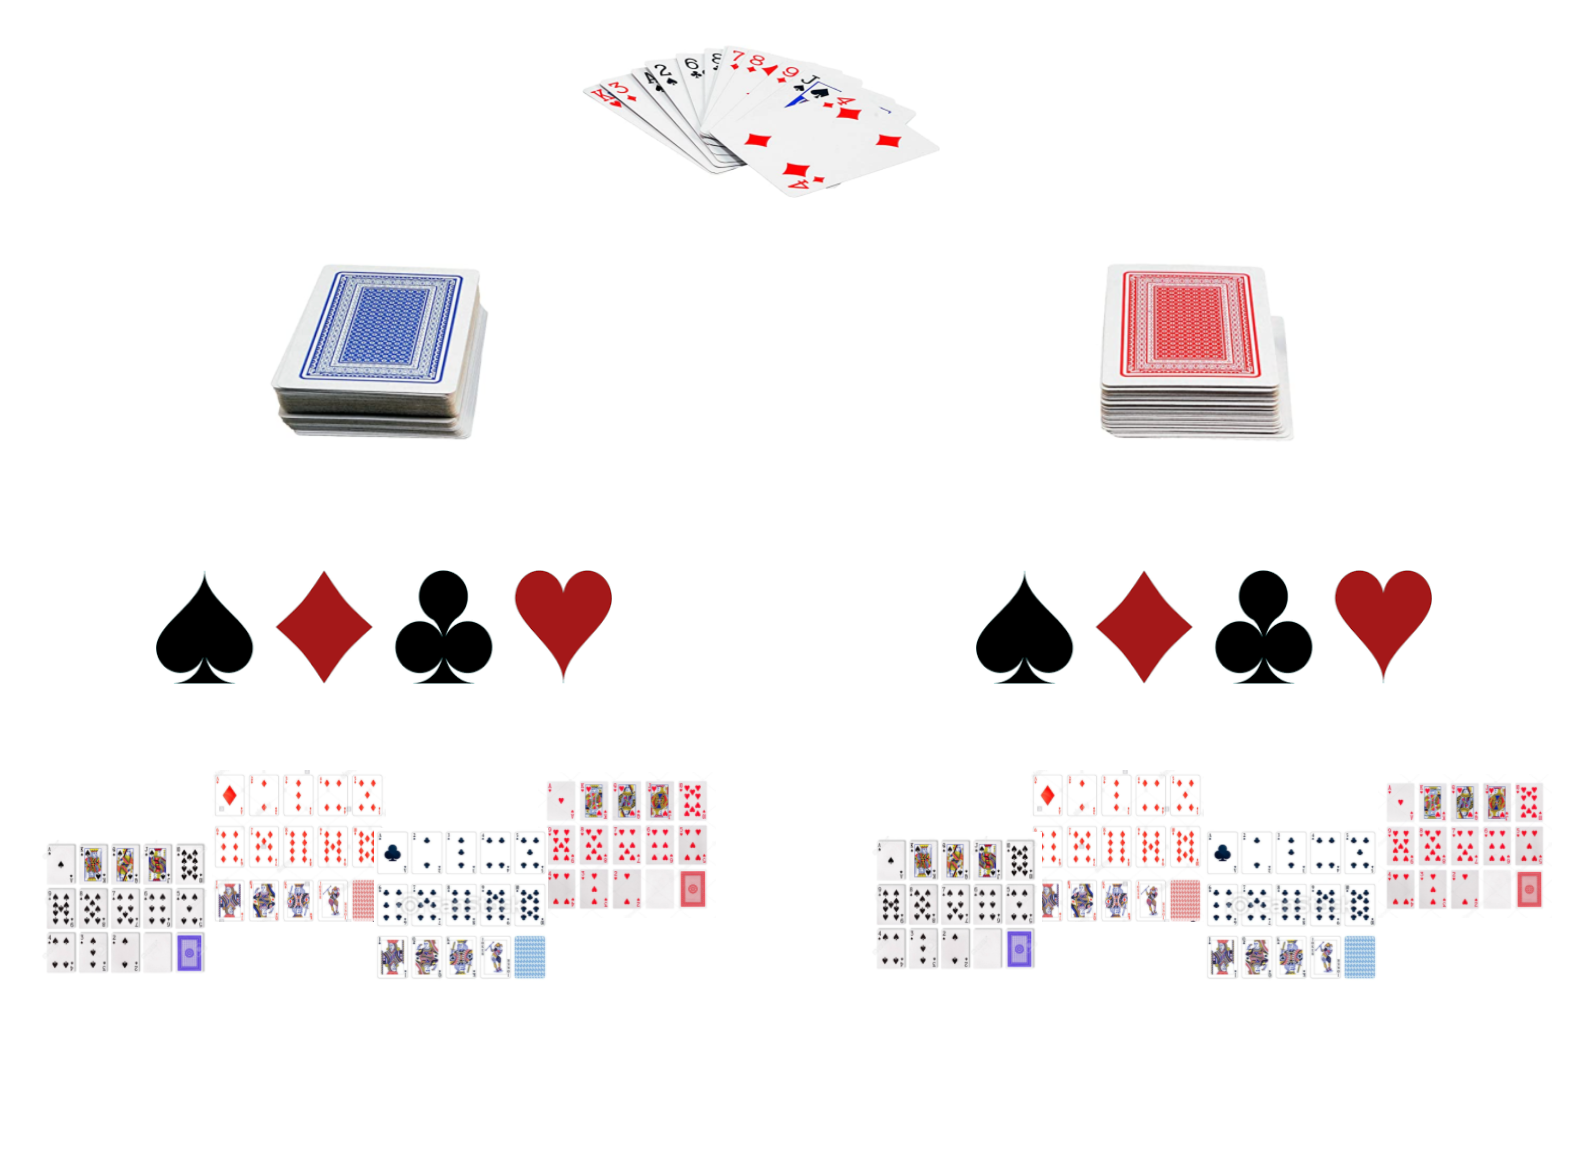

ADICIONAL: A su vez, resulta interesante mencionar que el método de bisección se utiliza en uno de los algoritmos de búsqueda de elementos dentro de un array más conocidos, la búsqueda binaria. 
Para poder aplicarlo, los elementos del array deben estar ordenado bajo un determinado criterio. Luego, se aplica bisección partiendo al array en mitades y chequeando en cuál mitad debe estar el elemento, esa mitad del array se conserva y la otra ya no se utiliza. Repitiendo el proceso, eventualmente se encuentra al elemento en cuestión (siempre y cuando esté en el vector).
La ventaja de este algoritmo frente a una búsqueda lineal (recorrer el vector y chequear elemento por elemento) es su complejidad algoritmica, la cual es O(log n), mientras que la de la búsqueda lineal es O(n), es decir es lineal. 

# **2. Hallar π por dos caminos:**

## **a. Cálculo de π con método de Newton-Raphson usando seno(x)**

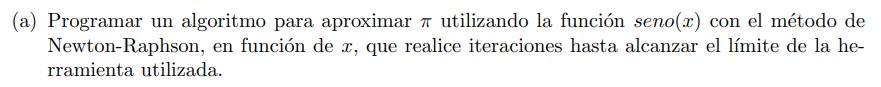

Para hallar una aproximación de π se debe hallar la primera raíz positiva de sen(x) (la cual es π). Para que el método converja devolviendo una aproximación de la raíz buscada, se debe ingresar una semilla cercana a la raiz en cuestión. Para ello, se puede emplear el método de bisección aunque en este caso no es necesario, pues se conoce que la raíz es π.

Es importante mencionar que se considerará como  0 (cero) a todo aquel valor que sea menor a 1e-15, ya que al trabajar con 64 bits se puede garantizar únicamente los primeros 15 dígitos: $\log_{10}(2^{53})\approx
15.95$ siendo 53 los bits de precisión (52 bits de la mantisa + 1 el bit con valor 1 implícito de la mantisa)


In [ ]:
#Definición de la función Newton-Raphson usada en el algoritmo
def funcion_newton_raphson_seno(x):
    return x - ( np.sin(x)/np.cos(x) )


#Algoritmo del método Newton-Raphson
def calcular_pi_newton_raphson(semilla):
    
    p_actual = semilla
    p_anterior = 0

    while( abs(p_actual - p_anterior) > (10**-15) ):

        if( abs(np.cos(p_actual)) < 10**-15 ):
            print("Error: División por 0! (se anula la derivada)")
            return p_anterior

        p_anterior = p_actual
        p_actual = funcion_newton_raphson_seno(p_actual)

    return p_actual

Por otro lado, se debe tener el cuidado de que la derivada no se anule, pues quedaría una división por cero, la misma se anula en π/2.
Toda esta información se puede observar en los siguientes gráficos (Ejecutar celda siguiente)

<Figure size 432x288 with 0 Axes>

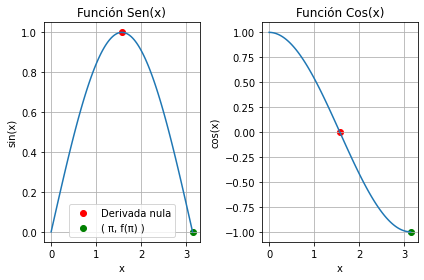

In [ ]:
dominio = np.linspace(0,np.pi, 100)

plt.figure(1)
fig, axs = plt.subplots(1,2)

axs[0].plot(dominio, np.sin(dominio))
axs[0].title.set_text('Función Sen(x)')
axs[0].set_ylabel('sin(x)')
axs[0].set_xlabel('x')
axs[0].grid()
axs[0].scatter((np.pi)/2, np.sin(np.pi /2), color = "red"  , label="Derivada nula")
axs[0].scatter((np.pi)  , np.sin(np.pi)   , color = "green", label = "( π, f(π) )")
axs[0].legend()

axs[1].plot(dominio, np.cos(dominio))
axs[1].title.set_text('Función Cos(x)')
axs[1].set_ylabel('cos(x)')
axs[1].set_xlabel('x')
axs[1].grid()
axs[1].scatter((np.pi)/2, np.cos(np.pi /2), color = "red")
axs[1].scatter((np.pi)  , np.cos(np.pi)   , color = "green")

fig.tight_layout()
plt.show()


## **b. Cálculo de π con Serie de Leibniz**

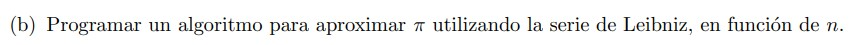

A partir de la serie de Leibniz, definida como:

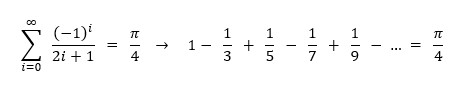

Con un numero finito '***n + 1***' de iteraciones, podemos hallar una aproximación de π multiplicando el resultado obtenido por 4. La expresión es la siguiente:

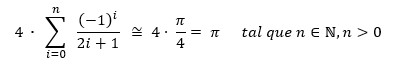



In [ ]:
def serie_leibniz(i):
    return ((-1)**i ) / (2*i + 1)

def calcular_pi_leibniz(n):

    if(n < 0):
        print("Error: No se acepta valor de 'n' negativo")

    pi = 0

    for i in range(0, n+1):
        pi += serie_leibniz(i)

    pi = 4 * pi
    return pi


## **c. Aproximaciones de π con Newton-Raphson y Leibniz: precisión simple (32 bits)**



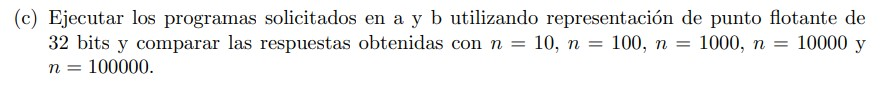

Ahora hay que trabajar con 32 bits, es decir, una precisión simple en la que sólo se puede asegurar los primeros 7 digitos: 
$\log_{10}(2^{24})\approx 7.22$

Para ello, se utiliza '***np.single***' de Numpy, que permite trabajar con un float de 32 bits.


In [ ]:
# Serie de Leibniz
a = np.single(calcular_pi_leibniz(10))
b = np.single(calcular_pi_leibniz(100))
c = np.single(calcular_pi_leibniz(1000))
d = np.single(calcular_pi_leibniz(10000))
e = np.single(calcular_pi_leibniz(100000))

# Método Newton-Raphson
semilla = 3.0
f = np.single(calcular_pi_newton_raphson(semilla))


print("Aproximaciones por Serie de Leibniz:\n")

j = 1
for i in [a,b,c,d,e]:
    print("n =", 10**j,"->  π =", i)
    j += 1

print("\n\nAproximación por método de Newton-Raphson:\n")
print("Semilla =", semilla, "->  π =",f)


Aproximaciones por Serie de Leibniz:

n = 10 ->  π = 3.2323158
n = 100 ->  π = 3.1514933
n = 1000 ->  π = 3.1425917
n = 10000 ->  π = 3.1416926
n = 100000 ->  π = 3.1416028


Aproximación por método de Newton-Raphson:

Semilla = 3.0 ->  π = 3.1415927


### Comparación de resultados:
Los resultados obtenidos son interesantes. En primer lugar se observa que al aproximar π por serie de Leibniz, a medida que incrementamos el n mejora la aproximación, lo cual resulta evidente de acuerdo a la expresión de dicha serie.

También se puede concluir que para hallar un valor cercano al valor verdadero de π se debe realizar gran cantidad de iteraciones (con n=100000 sólo se obtienen 4 cifras significativas correctas).
Por otro lado, hay una gran diferencia con Newton-Raphson. Con este método se obtiene en sólo 4 iteraciones al menos 7 cifras debido a que es la cantidad de digitos que podemos asegurar con 32 bits. 

Esto se debe al orden de convergencia que posee cada método, mientras que la serie de Leibniz es lineal, Newton-Raphson converge de forma cuadrática.

In [ ]:
#Chequeo adicional: son floats de 32 bits -> observar dtype=float32
np.finfo(a)

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

##**d. Aproximaciones de π con Newton-Raphson y Leibniz: precisión doble (64 bits)**

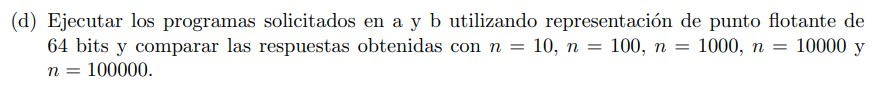

Ahora hay que trabajar con 64 bits, es decir, una precisión doble en la que sólo se puede asegurar los primeros 15 digitos: 
$\log_{10}(2^{53})\approx 15.95$

Para ello, se utiliza '***np.double***' de Numpy, que permite trabajar con un float de 64 bits. De todas formas, los floats de Python por defecto son de 64 bits.

In [ ]:
# Serie de Leibniz
u = np.double(calcular_pi_leibniz(10))
v = np.double(calcular_pi_leibniz(100))
w = np.double(calcular_pi_leibniz(1000))
x = np.double(calcular_pi_leibniz(10000))
y = np.double(calcular_pi_leibniz(100000))

# Método de Newton-Raphson
semilla = 3.0
z = np.double(calcular_pi_newton_raphson(semilla))

print("Aproximaciones por Serie de Leibniz:\n")

j = 1
for i in [u,v,w,x,y]:
    print("n =", 10**j,"->  π =", i)
    j += 1

print("\n\nAproximación por método de Newton-Raphson:\n")
print("Semilla =", semilla, "->  π =",z)

Aproximaciones por Serie de Leibniz:

n = 10 ->  π = 3.232315809405594
n = 100 ->  π = 3.1514934010709914
n = 1000 ->  π = 3.1425916543395442
n = 10000 ->  π = 3.1416926435905346
n = 100000 ->  π = 3.1416026534897203


Aproximación por método de Newton-Raphson:

Semilla = 3.0 ->  π = 3.141592653589793


### Comparación de resultados:
La comparación que se puede hacer es similar a la que se mencionó cuando se utilizó 32 bits. Es decir, las aproximaciones obtenidas por Leibniz siguen teniendo la misma cantidad de cifras significativas correctas, pero se acentúa la diferencia con Newton-Raphson. Con éste último se obtiene al menos 15 cifras significativas correctas, debido a que se itera hasta alcanzar el limite de la herramienta, por lo que al utilizar 64 bits podemos asegurar que como mínimo los primeros 15 dígitos son correctos.

In [ ]:
#Chequeo adicional: son floats de 64 bits -> observar dtype=float64
np.finfo(u)

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

## **e. Ejecución de a) y b) en calculadora**

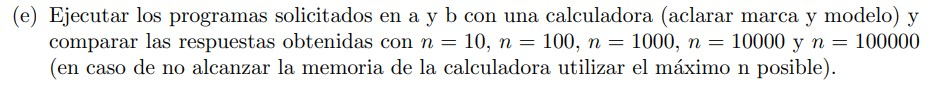

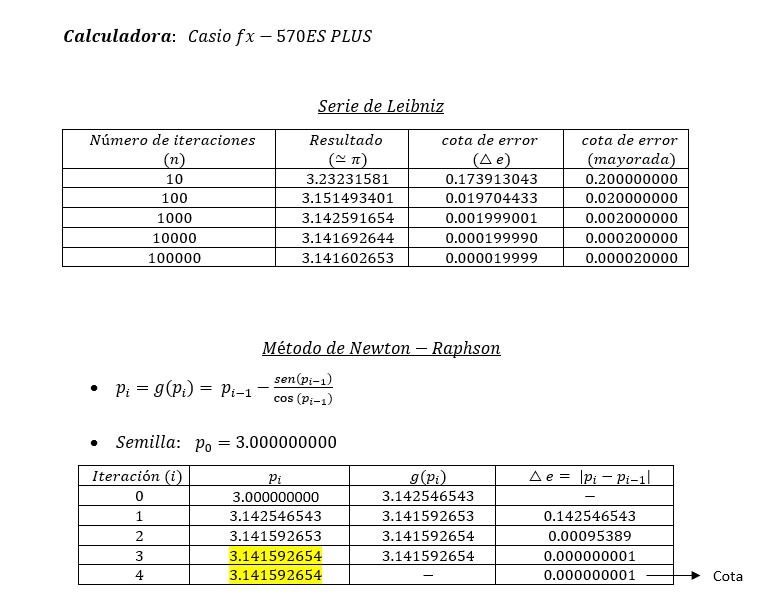

## **f. Representación de respuestas finales: π = ¯π + ∆π**

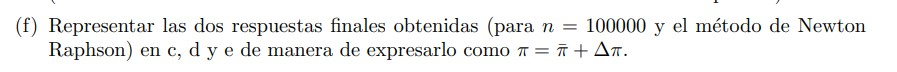

Los valores representativos ya se obtuvieron en los incisos c), d) y e). Ahora se busca obtener una cota del error para poder presentar una respuesta final.

Las cotas del error se las consideró de las siguientes formas:

*   **Newton-Raphson:** Como se itera hasta el límite de la herramienta utilizada, se obtiene que las últimas dos iteraciones devolverán el mismo resultado. Esto nos indica que se alcanzó el límite dado a que coinciden todos los bits que puede representar dicha herramienta. Sin embargo esto no significa que el error sea 0, sino que es menor a lo que la herramienta puede representar. Por lo tanto, se considera las siguientes cotas de error:
    * Para 32 bits: Se puede asegurar que los primeros 7 dígitos son correctos, por lo que se considera como cota del error: $0.0000001 = 1e-7$
    * Para 64 bits: Se puede asegurar que los primeros 15 dígitos son correctos, por lo que se considera como cota del error: $0.000000000000001 = 1e-15$
    * Para la calculadora: Pudo representar 9 decimales, se utiliza como cota del error: $0.000000001 = 1e-9$ 

*   **Serie de Leibniz:** Como se trata de una serie alternada, se puede demostrar fácilmente que: $|\sum_{i=n+1}^{\infty} \frac{(-1)^i}{(2i+1)}| < |\frac{(-1)^{n+1}}{(2(n+1)+1)}|$. 

    Por lo tanto, una cota de error válida es: $|\frac{(-1)^{n+1}}{(2n+3)}|$, lo cual representa el término siguiente a ***n*** en la serie de Leibniz. Entonces, para la cota del error se utiliza el valor de dicho término (mutliplicado por 4 y mayorado a una cifra significativa).



In [ ]:
print("Resultados inciso c): Aproximaciones de π con precisión simple \n")

print("\tMétodo Newton-Raphson:")
valor_representativo_nr_32bits = f
error_nr_32_bits = np.single(0.0000001)
valor_representativo_nr_32bits = redondeo_hacia_arriba(valor_representativo_nr_32bits, 7)
print("\tπ =",valor_representativo_nr_32bits,"±", error_nr_32_bits)


print("\n\t-------------------------------------------\n")

print("\tSerie de Leibniz (n = 100000):\n")

error_leibniz_32bits = np.single(4*abs(serie_leibniz(100000+1)))
print("\tLa cota del error obtenida es:", error_leibniz_32bits)

error_leibniz_32bits = redondeo_hacia_arriba(error_leibniz_32bits,5)
print("\tEn una cifra significativa queda:", error_leibniz_32bits)

valor_representativo_leibniz_32bits = redondeo_hacia_arriba(e, 5)
print("\n\tFinalmente, se obtiene:\n\tπ =",valor_representativo_leibniz_32bits,"±",error_leibniz_32bits)


Resultados inciso c): Aproximaciones de π con precisión simple 

	Método Newton-Raphson:
	π = 3.1415928 ± 1e-07

	-------------------------------------------

	Serie de Leibniz (n = 100000):

	La cota del error obtenida es: 1.99997e-05
	En una cifra significativa queda: 2e-05

	Finalmente, se obtiene:
	π = 3.14161 ± 2e-05


In [ ]:
print("Resultados inciso d): Aproximaciones de π con precisión doble \n")

print("\tMétodo Newton-Raphson:")
valor_representativo_nr_64bits = z
error_nr_64_bits = np.single(0.000000000000001)
valor_representativo_nr_64bits = redondeo_hacia_arriba(valor_representativo_nr_64bits, 15)
print("\tπ =",valor_representativo_nr_64bits,"±", error_nr_64_bits)

print("\n-------------------------------------------\n")

print("\tSerie de Leibniz (n = 100000):\n")

error_leibniz_64bits = np.double(4*abs(serie_leibniz(100000+1)))
print("\tLa cota del error obtenida es:", error_leibniz_64bits)

error_leibniz_64bits = redondeo_hacia_arriba(error_leibniz_64bits,5)
print("\tEn una cifra significativa queda:", error_leibniz_64bits)

valor_representativo_leibniz_64bits = redondeo_hacia_arriba(y, 5)
print("\n\tFinalmente, se obtiene:\n\tπ =",valor_representativo_leibniz_64bits,"±",error_leibniz_64bits)

Resultados inciso d): Aproximaciones de π con precisión doble 

	Método Newton-Raphson:
	π = 3.141592653589793 ± 1e-15

-------------------------------------------

	Serie de Leibniz (n = 100000):

	La cota del error obtenida es: 1.999970000449993e-05
	En una cifra significativa queda: 2e-05

	Finalmente, se obtiene:
	π = 3.14161 ± 2e-05


In [ ]:
print("Resultados inciso e): Aproximaciones de π con la calculadora \n")

print("\tMétodo Newton-Raphson:")
print("\n\tπ =",3.141592654,"±",0.000000001)

print("\n-------------------------------------------\n")

print("\tSerie de Leibniz (n = 100000):")
print("\n\tπ =",3.141602653,"y el error de ±",0.000020000,", entonces queda:")
print("\n\tπ =",3.14160,"±",0.00002)

Resultados inciso e): Aproximaciones de π con la calculadora 

	Método Newton-Raphson:

	π = 3.141592654 ± 1e-09

-------------------------------------------

	Serie de Leibniz (n = 100000):

	π = 3.141602653 y el error de ± 2e-05 , entonces queda:

	π = 3.1416 ± 2e-05


## **g. ¿π es una constante para la computadora?**

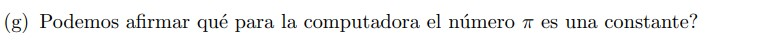

Para la computadora π no es una constante. La constante π es un numero irracional infinito, por lo tanto una computadora no puede representarlo con total exactitud ya que resulta imposible representar un numero infinito con una memoria finita. Esto se debe a que cada digito de un número está representado mediante 0s y 1s (sistema binario), donde cada uno de éstos ocupa 1 bit. En consecuencia, como la cantidad de bits disponibles es limitada, sólo se puede representar una cantidad finita de dígitos de π.
 
Lo que sí se puede hacer es representar π como una aproximación, y dependiendo de cuanta memoria destinemos (32 bits/4 bytes o 64 bits/ 8 bytes) obtendremos aproximaciones menos/más cercanas al valor real tal como se observa en los incisos anteriores, pero no deja de ser una aproximación.






# **3. Busqueda de raíces:**




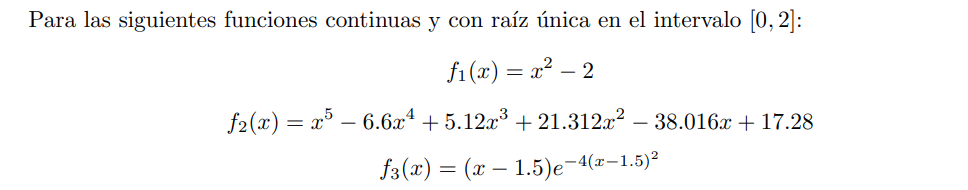

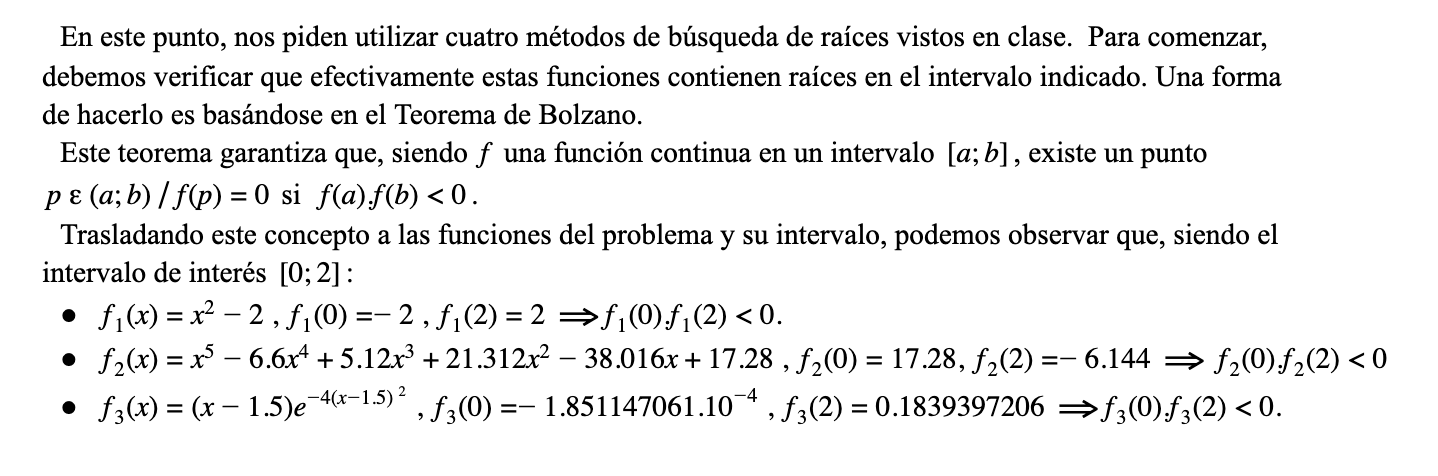


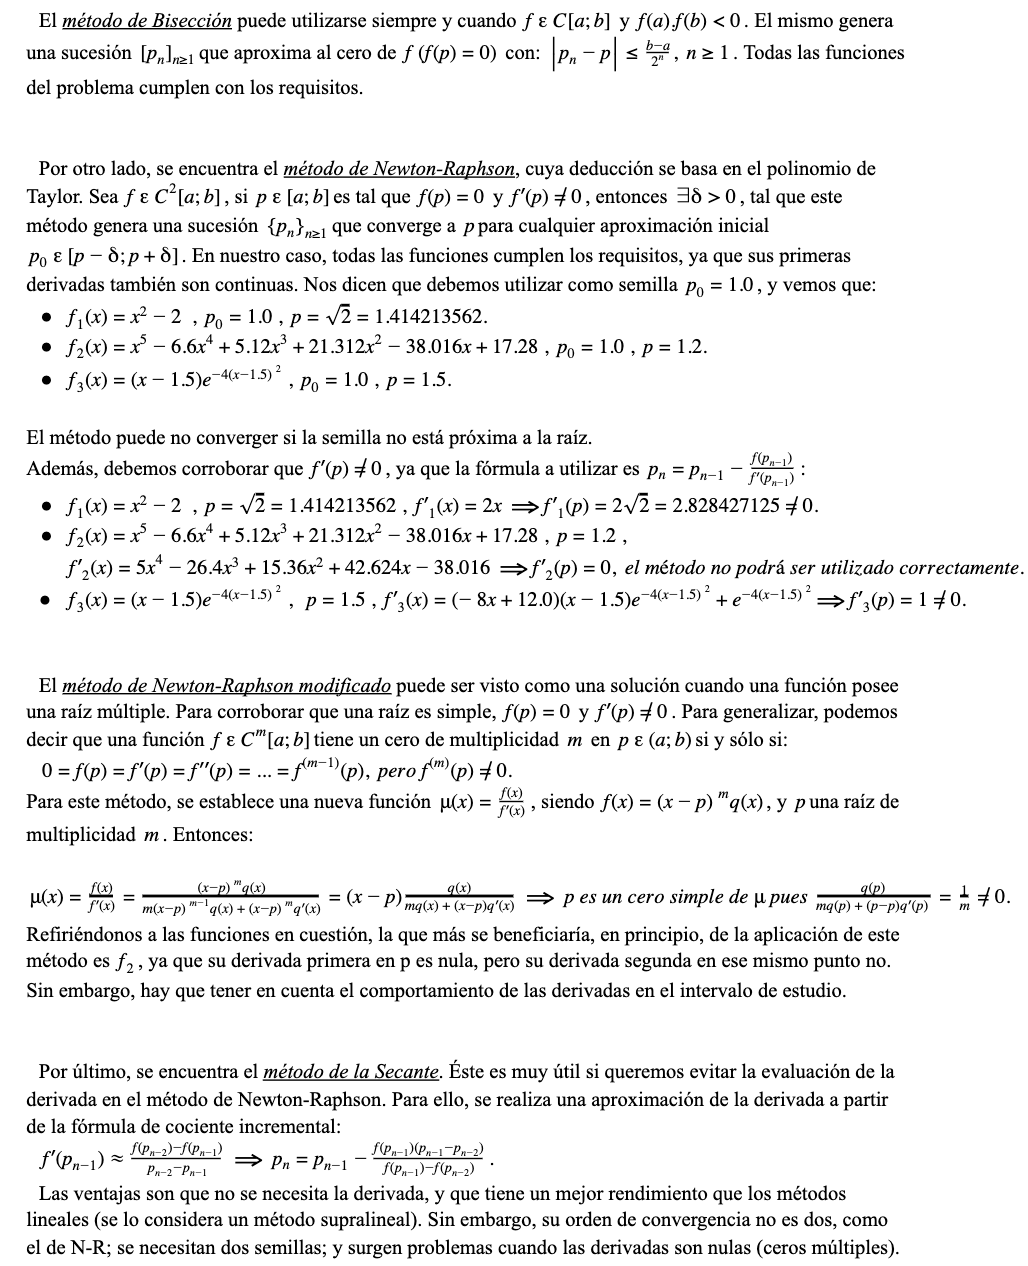

## **a. Gráfico de las funciones**

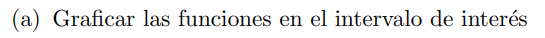

In [ ]:
#Definicion de las funciones

def f_1(x):
    return x**2 - 2

def f_2(x):
    return x**5 - 6.6 * x**4 + 5.12 * x**3 + 21.312 * x**2 - 38.016 * x + 17.28

def f_3(x):
    return (x - 1.5) * np.exp(-4 * (x - 1.5)**2)

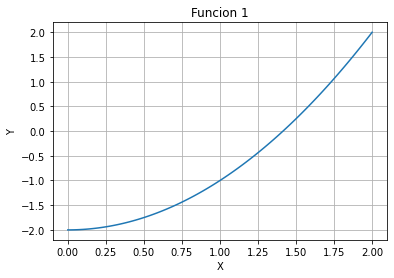

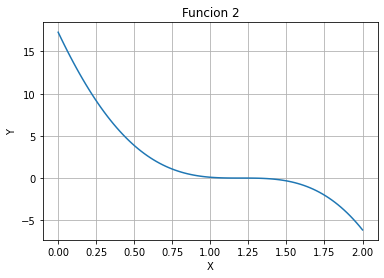

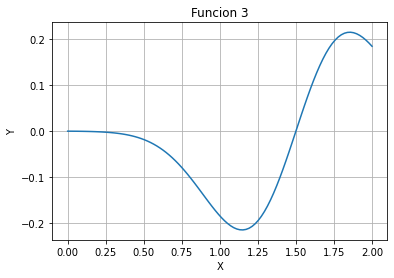

In [ ]:
X = np.linspace(0, 2, 100)

#Graficos

plt.figure(1)
plt.plot(X, f_1(X))
plt.grid()
plt.title("Funcion 1")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

plt.figure(2)
plt.plot(X, f_2(X))
plt.grid()
plt.title("Funcion 2")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

plt.figure(3)
plt.plot(X, f_3(X))
plt.grid()
plt.title("Funcion 3")
plt.xlabel("X")
plt.ylabel("Y")
plt.show() 

## **b. Obtención de raíces mediante distintos métodos**

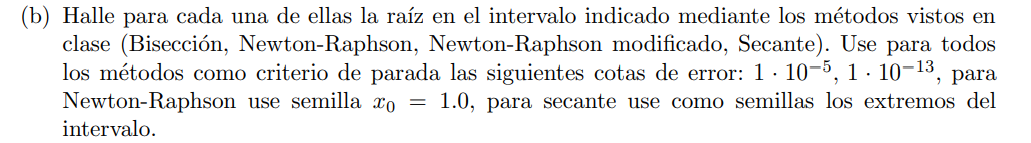

In [ ]:
#Implementacion de los metodos de busqueda de raices y de calculo de orden de convergencia/constante asintotica

def calculo_orden_convergencia(primer_error_sucesivo, segundo_error_sucesivo, tercer_error_sucesivo):
    if segundo_error_sucesivo != 0 and primer_error_sucesivo != 0:  
        if np.log(segundo_error_sucesivo/primer_error_sucesivo) != 0:
            return ( np.log(tercer_error_sucesivo/segundo_error_sucesivo) / np.log(segundo_error_sucesivo/primer_error_sucesivo) )
        

def calculo_constante_asintotica(error_sucesivo_actual, error_sucesivo_anterior, orden_convergencia_actual):
    if orden_convergencia_actual:
        if error_sucesivo_anterior ** (orden_convergencia_actual) != 0:
            return ( error_sucesivo_actual / (error_sucesivo_anterior ** (orden_convergencia_actual)) )


def cargar_orden_convergencia_y_cte_asintotica(lista_orden_convergencia, lista_cte_asintotica, lista_errores, indice_actual):
    orden_convergencia_actual = calculo_orden_convergencia(lista_errores[indice_actual-2], lista_errores[indice_actual-1], lista_errores[indice_actual])
    constante_asintotica_actual = calculo_constante_asintotica(lista_errores[indice_actual], lista_errores[indice_actual-1], orden_convergencia_actual)
            
    lista_orden_convergencia.append(orden_convergencia_actual)
    lista_cte_asintotica.append(constante_asintotica_actual)

In [ ]:
#Implementación de Bisección, Newton-Raphson, Newton-Raphson modificado y Secante.

EXTREMO_IZQ = 0
EXTREMO_DER = 2
COTA_ERR_1 = 0.00001
COTA_ERR_2 = 0.0000000000001
MAX_ITER = 150



def biseccion(funcion, extremo_izq, extremo_der, cota_error, max_iteraciones):
    
    p = extremo_izq
    iteraciones = 0
    error = cota_error + 1 #Para entrar al while. Este error no se guarda
    
    sucesion = []
    errores = ["-"]
    ordenes_convergencia = ["-", "-", "-"]
    constante_asintotica  = ["-", "-", "-"]
    
    while ((iteraciones <= max_iteraciones) and (error > cota_error)):
        p = (extremo_izq + extremo_der) / 2
        sucesion.append(p)
        
        if funcion(extremo_izq) * funcion(p) > 0:
            extremo_izq = p
        else:
            extremo_der = p

        if iteraciones >= 1:
            error = abs(p - sucesion[iteraciones-1])
            if error == 0:
                error = 10**-15
            errores.append(error)
        
        if iteraciones >= 5:
            cargar_orden_convergencia_y_cte_asintotica(ordenes_convergencia, constante_asintotica, errores, iteraciones)
        
        iteraciones += 1
    
    if( iteraciones == max_iteraciones):
        print("Error: No converge!")        

    return sucesion, errores, ordenes_convergencia, constante_asintotica

#---------------------------------------------------------------------------------------
def newton_raphson(funcion, derivada, semilla, cota_error, max_iteraciones):
    
    p_actual = semilla
    iteraciones = 0
    error = cota_error + 1
    
    sucesion = [p_actual]
    errores = ["-"]
    ordenes_convergencia = ["-", "-", "-"]
    constante_asintotica  = ["-", "-", "-"]

    while ( (iteraciones <= max_iteraciones)  and (error > cota_error) ):
        
        if abs(derivada(p_actual)) <= 10**-15:
            print("Error: División por 0! (se anula la derivada)")
            return sucesion, errores, ordenes_convergencia, constante_asintotica
        
        p_actual = p_actual - (funcion(p_actual) / derivada(p_actual))
        
        error = abs(p_actual - sucesion[iteraciones])
        if error == 0:
            error = 10**-15
        sucesion.append(p_actual)
        errores.append(error)
        iteraciones += 1

        if(iteraciones >= 3):
            cargar_orden_convergencia_y_cte_asintotica(ordenes_convergencia, constante_asintotica, errores, iteraciones)
    
    if( iteraciones == max_iteraciones):
        print("Error: No converge!")
        

    return sucesion, errores, ordenes_convergencia, constante_asintotica

#---------------------------------------------------------------------------------------
def newton_raphson_mod(funcion, derivada, derivada_segunda, semilla, cota_error, max_iteraciones):
    
    p_actual = semilla
    iteraciones = 0
    error = cota_error + 1
    
    sucesion = [p_actual]
    errores = ["-"]
    ordenes_convergencia = ["-","-","-"]
    constante_asintotica = ["-","-","-"]

    while ((iteraciones <= max_iteraciones) and (error) > cota_error):
       
        if abs((derivada(p_actual))**2 - funcion(p_actual) * derivada_segunda(p_actual)) <= 10**-15:
            print("Error: División por 0! (se anula la derivada)")
            return sucesion, errores, ordenes_convergencia, constante_asintotica
        
        p_actual = p_actual - (funcion(p_actual) * derivada(p_actual)) / ((derivada(p_actual))**2 - funcion(p_actual) * derivada_segunda(p_actual))
        sucesion.append(p_actual)
        error = abs(p_actual - sucesion[iteraciones])
        if error == 0:
            error = 10**-15
        errores.append(error)
        iteraciones += 1
        if iteraciones >= 3:
            cargar_orden_convergencia_y_cte_asintotica(ordenes_convergencia, constante_asintotica, errores, iteraciones)
    if( iteraciones == max_iteraciones):
        print("Error: No converge!")
    
    return sucesion, errores, ordenes_convergencia, constante_asintotica

#---------------------------------------------------------------------------------------
def secante(funcion, semilla_1, semilla_2, cota_error, max_iteraciones):
    iteraciones = 0
    error = cota_error + 1
    
    sucesion = [semilla_1, semilla_2]
    errores = ["-","-"]
    ordenes_convergencia = ["-", "-", "-"]
    constante_asintotica  = ["-", "-", "-"]
    
    while ((iteraciones <= max_iteraciones) and (error > cota_error)):
        p_n_menos1 = sucesion[iteraciones + 1]
        p_n_menos2 = sucesion[iteraciones]

        if (abs(funcion(p_n_menos1) - funcion(p_n_menos2)) < 10**-15):
            print("Error: División por 0!")
            return sucesion, errores, ordenes_convergencia, constante_asintotica
        
        p_n = p_n_menos1 - (funcion(p_n_menos1) * (p_n_menos1 - p_n_menos2)) / (funcion(p_n_menos1) - funcion(p_n_menos2))
        sucesion.append(p_n)
        error = abs(p_n_menos1 - p_n)
        
        if error == 0:
            error = 10**-15
        errores.append(error)
        iteraciones += 1
        
        if iteraciones >= 4:
            cargar_orden_convergencia_y_cte_asintotica(ordenes_convergencia, constante_asintotica, errores, iteraciones)
        if( iteraciones == max_iteraciones):
            print("Error: No converge!")
    
    return sucesion, errores, ordenes_convergencia, constante_asintotica

In [ ]:
#Definicion de las funciones para mostrar resultados

def imprimir_resultados(nombre_metodo, cota_error, sucesion, errores):
    print(f"\nMetodo: {nombre_metodo} \t Cota de error: {cota_error}")
    print("===============================================")
    print("Iter. \t\t P_n \t\t Error")
    for i in range(0, len(sucesion)):
        if i < 4 or i > len(sucesion) - 3: #Para que solo imprima las primeras y las ultimas iteraciones
            print(f"{i} \t\t {sucesion[i]} \t\t {errores[i]}")
        
def graficar_convergencia(n_funcion, cota_error, ordenes_convergencia_b, ordenes_convergencia_nr, ordenes_convergencia_nrm, ordenes_convergencia_s):
    plt.figure()
    plt.title(f"Funcion {n_funcion} cota de error {cota_error}")
    plt.semilogy(ordenes_convergencia_b[3:30], label = "Biseccion")
    plt.semilogy(ordenes_convergencia_nr[3:30], label = "Newton-Raphson")
    plt.semilogy(ordenes_convergencia_nrm[3:30], label = "Newton-Raphson modificado")
    plt.semilogy(ordenes_convergencia_s[3:30], label = "Secante", linestyle = "dotted")  
    plt.legend()
    plt.xlabel("Iteracion")
    plt.ylabel("Orden de convergencia")
    plt.grid()
    plt.show()

def graficar_const_asintotica(n_funcion, cota_error, constante_asintotica_b, constante_asintotica_nr, constante_asintotica_nrm, constante_asintotica_s):
    plt.figure()
    plt.title(f"Funcion {n_funcion} cota de error {cota_error}")
    plt.semilogy(constante_asintotica_b[3:30], label = "Biseccion")
    plt.semilogy(constante_asintotica_nr[3:30], label = "Newton-Raphson")
    plt.semilogy(constante_asintotica_nrm[3:30], label = "Newton-Raphson modificado")
    plt.semilogy(constante_asintotica_s[3:30], label = "Secante", linestyle = "dotted")
    plt.legend()
    plt.xlabel("Iteracion")
    plt.ylabel("Constante asintotica")
    plt.grid()
    plt.show()        
 
def raices_funcion(numero_funcion, f, f_derivada, f_derivada_seg, semilla_nr, semilla_s_1, semilla_s_2):
    
    sucesion_b_1, errores_b_1, ordenes_convergencia_b_1, const_asintotica_b_1 = biseccion(f, EXTREMO_IZQ, EXTREMO_DER, COTA_ERR_1, MAX_ITER)
    imprimir_resultados("Biseccion", COTA_ERR_1, sucesion_b_1, errores_b_1) 
    print("-------------------------------------------------------------------\n")

    sucesion_b_2, errores_b_2, ordenes_convergencia_b_2, const_asintotica_b_2 = biseccion(f, EXTREMO_IZQ, EXTREMO_DER, COTA_ERR_2, MAX_ITER)
    imprimir_resultados("Biseccion", COTA_ERR_2, sucesion_b_2, errores_b_2)
    print("-------------------------------------------------------------------\n")
    
    sucesion_nr_1, errores_nr_1, ordenes_convergencia_nr_1, const_asintotica_nr_1 = newton_raphson(f, f_derivada, semilla_nr, COTA_ERR_1, MAX_ITER)
    imprimir_resultados("Newton-Raphson", COTA_ERR_1, sucesion_nr_1, errores_nr_1)
    print("-------------------------------------------------------------------\n")
    
    sucesion_nr_2, errores_nr_2, ordenes_convergencia_nr_2, const_asintotica_nr_2 = newton_raphson(f, f_derivada, semilla_nr, COTA_ERR_2, MAX_ITER)
    imprimir_resultados("Newton-Raphson", COTA_ERR_2, sucesion_nr_2, errores_nr_2)
    print("-------------------------------------------------------------------\n")
    
    sucesion_nrm_1, errores_nrm_1, ordenes_convergencia_nrm_1, const_asintotica_nrm_1 = newton_raphson_mod(f, f_derivada, f_derivada_seg, semilla_nr, COTA_ERR_1, MAX_ITER)
    imprimir_resultados("Newton-Raphson modificado", COTA_ERR_1, sucesion_nrm_1, errores_nrm_1)
    print("-------------------------------------------------------------------\n")
    
    sucesion_nrm_2, errores_nrm_2, ordenes_convergencia_nrm_2, const_asintotica_nrm_2 = newton_raphson_mod(f, f_derivada, f_derivada_seg, semilla_nr, COTA_ERR_2, MAX_ITER)
    imprimir_resultados("Newton-Raphson modificado", COTA_ERR_2, sucesion_nrm_2, errores_nrm_2)
    print("-------------------------------------------------------------------\n")
    
    sucesion_s_1, errores_s_1, ordenes_convergencia_s_1, const_asintotica_s_1 = secante(f, semilla_s_1, semilla_s_2, COTA_ERR_1, MAX_ITER)
    imprimir_resultados("Secante", COTA_ERR_1, sucesion_s_1, errores_s_1)
    print("-------------------------------------------------------------------\n")
    
    sucesion_s_2, errores_s_2, ordenes_convergencia_s_2, const_asintotica_s_2 = secante(f, semilla_s_1, semilla_s_2, COTA_ERR_2, MAX_ITER)
    imprimir_resultados("Secante", COTA_ERR_2, sucesion_s_2, errores_s_2)
    print("-------------------------------------------------------------------\n")
    

    graficar_convergencia(numero_funcion, COTA_ERR_1, ordenes_convergencia_b_1, ordenes_convergencia_nr_1, ordenes_convergencia_nrm_1, ordenes_convergencia_s_1)
    graficar_const_asintotica(numero_funcion, COTA_ERR_1, const_asintotica_b_1, const_asintotica_nr_1, const_asintotica_nrm_1, const_asintotica_s_1)
    graficar_convergencia(numero_funcion, COTA_ERR_2, ordenes_convergencia_b_2, ordenes_convergencia_nr_2, ordenes_convergencia_nrm_2, ordenes_convergencia_s_2)
    graficar_const_asintotica(numero_funcion, COTA_ERR_2, const_asintotica_b_2, const_asintotica_nr_2, const_asintotica_nrm_2, const_asintotica_s_2)


A continuación se presenta la búqueda de raices de cada una de las tres funciones aplicando los algoritmos implementados, visualizándose también las primeras y últimas iteraciones para cada caso. Además, es importante mencionar que debajo se encuentran los gráficos referidos al orden de convergencia y de la constante asintótica. Se decidió colocarlos en esta sección en lugar de en la sección '.d' para que se puedan visualizar junto con las iteraciones y poder comprenderlos mejor.

### **Funcion 1**

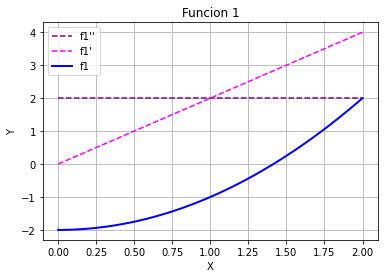



Raiz de f_1 en el intervalo [0,2] 


Metodo: Biseccion 	 Cota de error: 1e-05
Iter. 		 P_n 		 Error
0 		 1.0 		 -
1 		 1.5 		 0.5
2 		 1.25 		 0.25
3 		 1.375 		 0.125
16 		 1.4141998291015625 		 1.52587890625e-05
17 		 1.4142074584960938 		 7.62939453125e-06
-------------------------------------------------------------------


Metodo: Biseccion 	 Cota de error: 1e-13
Iter. 		 P_n 		 Error
0 		 1.0 		 -
1 		 1.5 		 0.5
2 		 1.25 		 0.25
3 		 1.375 		 0.125
43 		 1.4142135623729928 		 1.1368683772161603e-13
44 		 1.4142135623730496 		 5.684341886080802e-14
-------------------------------------------------------------------


Metodo: Newton-Raphson 	 Cota de error: 1e-05
Iter. 		 P_n 		 Error
0 		 1.0 		 -
1 		 1.5 		 0.5
2 		 1.4166666666666667 		 0.08333333333333326
3 		 1.4142156862745099 		 0.002450980392156854
4 		 1.4142135623746899 		 2.123899820016817e-06
-------------------------------------------------------------------


Metodo: Newton-Raphson 	 Cota de error: 1e-13
Iter. 		

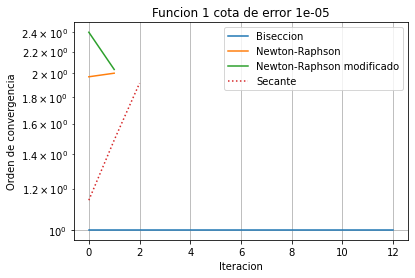

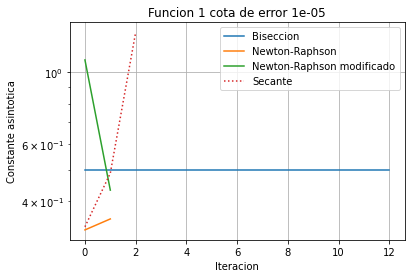

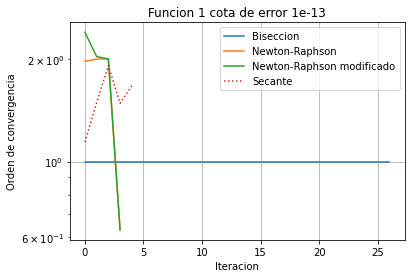

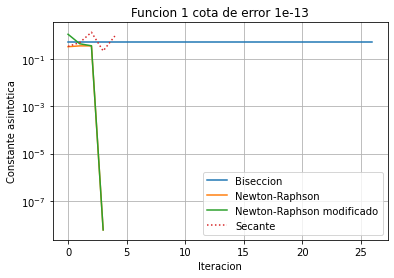

In [ ]:
#Funcion 1

def f_1(x):
    return x**2 - 2

def f_1_derivada(x):
    return 2 * x

def f_1_derivada_seg(X):
    return 2


#Se grafica la funcion, su derivada de primer orden y la de segundo orden superpuestas para entender mejor la situación 
plt.figure()
plt.plot(X, np.full(100,2), color='purple', linestyle='dashed', label="f1''")
plt.plot(X, f_1_derivada(X), color='magenta', linestyle='dashed', label="f1'")
plt.plot(X, f_1(X), color='blue',linewidth=2, label='f1')
plt.grid()
plt.title("Funcion 1")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


#Se imprimen los resultados.
print("\n\nRaiz de f_1 en el intervalo [0,2] \n")
raices_funcion(1, f_1, f_1_derivada, f_1_derivada_seg, 1.0, EXTREMO_IZQ, EXTREMO_DER)

### **Funcion 2**

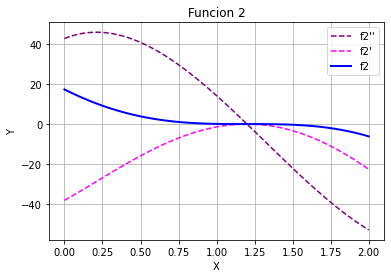



Raiz de f_2 en el intervalo [0,2] 


Metodo: Biseccion 	 Cota de error: 1e-05
Iter. 		 P_n 		 Error
0 		 1.0 		 -
1 		 1.5 		 0.5
2 		 1.25 		 0.25
3 		 1.125 		 0.125
16 		 1.1999969482421875 		 1.52587890625e-05
17 		 1.2000045776367188 		 7.62939453125e-06
-------------------------------------------------------------------


Metodo: Biseccion 	 Cota de error: 1e-13
Iter. 		 P_n 		 Error
0 		 1.0 		 -
1 		 1.5 		 0.5
2 		 1.25 		 0.25
3 		 1.125 		 0.125
43 		 1.2000040998499344 		 1.1368683772161603e-13
44 		 1.2000040998499912 		 5.684341886080802e-14
-------------------------------------------------------------------


Metodo: Newton-Raphson 	 Cota de error: 1e-05
Iter. 		 P_n 		 Error
0 		 1.0 		 -
1 		 1.0670391061452542 		 0.06703910614525421
2 		 1.1115008625849991 		 0.044461756439744926
3 		 1.1410565672168191 		 0.02955570463182
22 		 1.1999736678970567 		 1.342904836221237e-05
23 		 1.1999826569716792 		 8.989074622434146e-06
---------------------------------------------

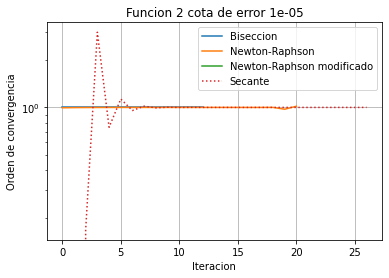

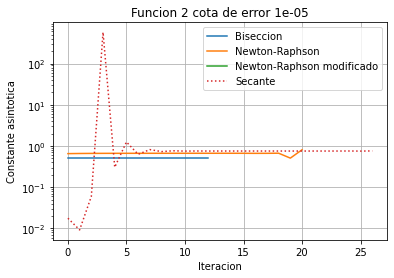

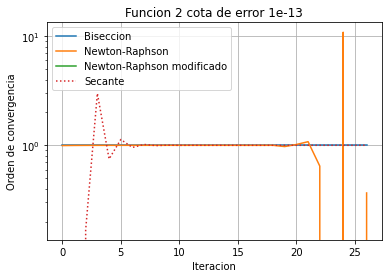

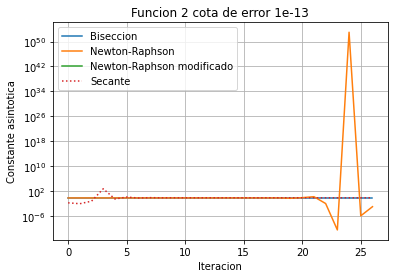

In [ ]:
#Funcion 2

def f_2(x):
    return x**5 - 6.6 * x**4 + 5.12 * x**3 + 21.312 * x**2 - 38.016 * x + 17.28

def f_2_derivada(x):
    return 5 * x**4 - 26.4 * x**3 + 15.36 * x**2 + 42.624 * x - 38.016

def f_2_derivada_seg(x):
    return 20 * x**3 - 79.2 * x**2 + 30.72 * x + 42.624


#Se grafica la funcion, su derivada de primer orden y la de segundo orden superpuestas para entender mejor la situación 
plt.figure()
plt.plot(X, f_2_derivada_seg(X), color='purple', linestyle='dashed', label="f2''")
plt.plot(X, f_2_derivada(X), color='magenta', linestyle='dashed', label="f2'")
plt.plot(X, f_2(X), color='blue',linewidth=2, label='f2')
plt.grid()
plt.title("Funcion 2")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


#Se imprimen los resultados
print("\n\nRaiz de f_2 en el intervalo [0,2] \n")
raices_funcion(2, f_2, f_2_derivada, f_2_derivada_seg, 1.0, EXTREMO_IZQ, EXTREMO_DER)

### **Funcion 3**

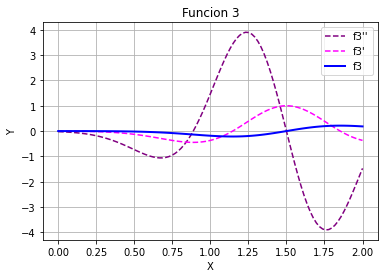

Raiz de f_3 en el intervalo [0,2] 


Metodo: Biseccion 	 Cota de error: 1e-05
Iter. 		 P_n 		 Error
0 		 1.0 		 -
1 		 1.5 		 0.5
2 		 1.25 		 0.25
3 		 1.375 		 0.125
16 		 1.4999847412109375 		 1.52587890625e-05
17 		 1.4999923706054688 		 7.62939453125e-06
-------------------------------------------------------------------


Metodo: Biseccion 	 Cota de error: 1e-13
Iter. 		 P_n 		 Error
0 		 1.0 		 -
1 		 1.5 		 0.5
2 		 1.25 		 0.25
3 		 1.375 		 0.125
43 		 1.4999999999998863 		 1.1368683772161603e-13
44 		 1.4999999999999432 		 5.684341886080802e-14
-------------------------------------------------------------------

Error: División por 0! (se anula la derivada)

Metodo: Newton-Raphson 	 Cota de error: 1e-05
Iter. 		 P_n 		 Error
0 		 1.0 		 -
1 		 0.5 		 0.5
2 		 0.35714285714285715 		 0.14285714285714285
3 		 0.2361925331687751 		 0.12095032397408206
34 		 -1.6139551633353189 		 0.04122625404863789
35 		 -1.6546212638068187 		 0.04066610047149988
-------------------------------

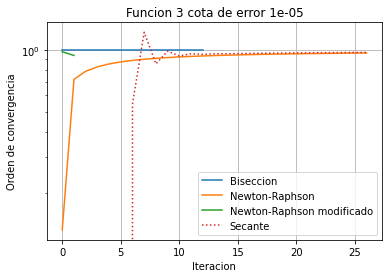

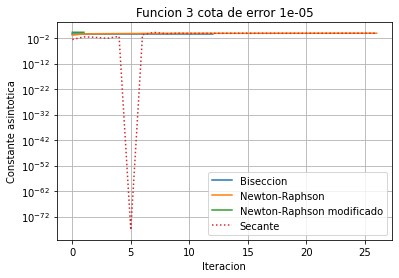

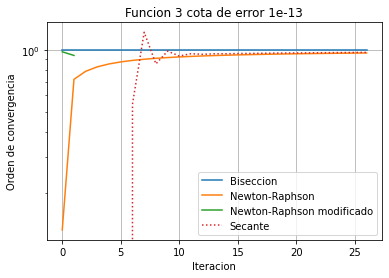

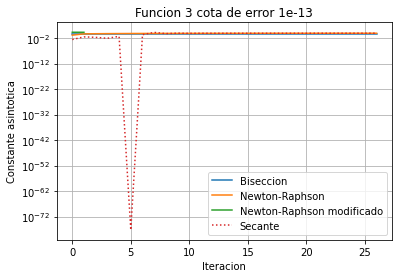

In [ ]:
#Funcion 3

def f_3(x):
    return (x - 1.5) * np.exp(-4 * (x - 1.5)**2)

def f_3_derivada(x):
    return (-8 * x + 12) * (x - 1.5) * np.exp(-4 * (x - 1.5)**2) + np.exp(-4 * (x - 1.5)**2)

def f_3_derivada_seg(x):
    return (-24 * x + (x - 1.5) * (8 * x - 12)**2 + 36) * np.exp(-4 * (x - 1.5)**2)


#Se grafica la funcion, su derivada de primer orden y la de segundo orden superpuestas para entender mejor la situación 
plt.figure()
plt.plot(X, f_3_derivada_seg(X), color='purple', linestyle='dashed', label="f3''")
plt.plot(X, f_3_derivada(X), color='magenta', linestyle='dashed', label="f3'")
plt.plot(X, f_3(X), color='blue',linewidth=2, label='f3')
plt.grid()
plt.title("Funcion 3")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


#Se imprimen los resultados
print("\n\nRaiz de f_3 en el intervalo [0,2] \n")
raices_funcion(3, f_3, f_3_derivada, f_3_derivada_seg, 1.0, EXTREMO_IZQ, EXTREMO_DER)

## **c. Obtención de raíces mediante funciones integradas o de librerías externas**

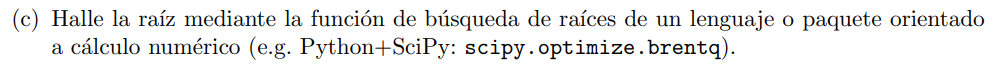

In [ ]:
from scipy import optimize

raiz_f_1 = optimize.brentq(f_1, EXTREMO_IZQ, EXTREMO_DER)
raiz_f_2 = optimize.brentq(f_2, EXTREMO_IZQ, EXTREMO_DER)
raiz_f_3 = optimize.brentq(f_3, EXTREMO_IZQ, EXTREMO_DER)

print("Raices obtenidas mediante la funcion brentq")
print(f"Raiz de la funcion 1: {raiz_f_1}")
print(f"Raiz de la funcion 2: {raiz_f_2}")
print(f"Raiz de la funcion 3: {raiz_f_3}")



Raices obtenidas mediante la funcion brentq
Raiz de la funcion 1: 1.4142135623731364
Raiz de la funcion 2: 1.2000081652661798
Raiz de la funcion 3: 1.5000000000000198


## **d. Comparación de resultados. Ordenes de convergencia y constantes asintóticas** 

### **Función 1**

Como se puede observar en los gráficos, los ordenes de convergencia y las constantes asintoticas del error no son representadas con gran exactitud. 
Los valores esperados son:

* Orden de convergencia:
    * Bisección: 1 (lineal) -> representado correctamente para ambas cotas de error.
    * Newton-Raphson: 2 (cuadrático) -> el valor se asemeja bastante, sobretodo teniendo en cuenta la poca cantidad de iteraciones con las que se está trabajando.
    * Newton-Raphson modificado: 2 -> tambien se asemeja bastante los valores obtenidos, aunque en el gráfico correspondiente a la cota de error 1e-13 cae abruptamente el orden, lo cual no es correcto.
    * Secante: aproximadamente 1.6 (supralineal) -> en el gráfico de la cota de error 1e-5 se excede un poco, aunque en el de la cota de error 1e-13 se ajusta bien.

La representación de los órdenes de convergencia en general fue decente.

* Constante asintotica del error:
    * Bisección: 0.5 (lineal) Para ambos gráficos se obtuvo el resultado esperado.
    * Newton-Raphson: 0.5 Para ambos gráficos se obtuvo un resultado similar a 0.5.
    * Newton-Raphson modificado: 0.5 -> En los dos gráficos comienza ajustándose bien al valor verdadero pero en la última iteración, al igual que con el orden de convergencia, comienza a tender a cero.
    * Secante: 0.5 -> Para el gráfico correspondiente a la cota de 1e-13 se obtiene una aproximación decente. Sin embargo, para el otro está bastante alejada al valor verdadero debido a que es hasta mayor a 1 lo cual no tiene sentido.

Ahora volvemos a graficar pero con una semilla más alejada (0.25) y veremos que los resultados mejoran.



### **Función 2**


* Orden de convergencia:
    * Bisección: 1 (lineal) -> representado correctamente para ambas cotas de error.
    * Newton-Raphson: En este caso ocurre algo particular. Si analizamos las condiciones de convergencia para este método se puede notar que a pesar de que la semilla es cercana a la raíz, la derivada primera (y segunda también) se anula en las regiones cercanas a la raiz. Esto ocasiona que dicho método pierda esa convergencia cuadrática y comience a tener una convergencia tendiendo a ser lineal. Analizándolo graficamente se puede observar que las derivadas son cada vez más horizontales, de manera tal que intersecan al eje X en una posición más lejana y realentiza la convergencia. En síntesis, lo que se representa en ambos gráficos es acertado aunque en el de cota de error 1e-13 se presenta una irregularidad entre las iteraciones 23, 24 y 25.
    * Newton-Raphson modificado: Para este caso también ocurre una particularidad. Analizando el grafico de f_2 y sus derivadas, se observa que la raíz de f_2 y la de su segunda derivada es aproximadamente la misma (la diferencia ni siquiera se puede representar en 64 bits, se obtiene 0). Esto provoca que a medida que avanzan las iteraciones y se produzca un acercamiento a la raiz de f_2, también se produce un acercamiento a la raiz de la segunda derivada, con lo cual inevitablemente se produce una división por cero que frena el proceso. Como se frena en la tercer iteración, no se cuentan con datos suficientes para calcular el orden de convergencia y la constante asintotica del error, por eso no se visualizan en el gráfico.
    Por otro lado, también es interesante observar que, a pesar de no converger, en tan sólo dos iteraciones alcanzó un valor relativamente cercano a la raiz evidenciando una gran diferencia respecto del Newton-Raphson sin modificar.
    * Secante: Ocurre algo similar que con el método de Newton-Raphson. Si bien no hay que chequear que no se anule la derivada, se presenta una desventaja: en el intervalo estudiado, la función tiene un comportamiento bastante horizontal con pendientes bajas. Esto provoca que al obtener la secante entre puntos de la funcion (especialmente en regiones cercanas a la raiz donde las derivadas se anulan), la misma tenga pendiente baja y por lo tanto interseque al eje X en una zona más alejada. Esto realentiza la convergencia y la misma tiende a ser lineal como se observa en los gráficos. 


* Constante asintotica del error:
    * Bisección: 0.5 (lineal) Para ambos gráficos se obtuvo aproximadamente el resultado esperado.
    * Newton-Raphson: En ambos gráficos el valor se mantiene cerca del esperado, aunque un poco por encima. Notar que nuevamente, en las iteraciones 23, 24 y 25 se visualizan irregularidades.
    * Newton-Raphson modificado: No se cuentan con datos suficientes como para calcular ni el orden de convergencia ni la constante asintotica, el método no converge.
    * Secante: La representación de la constante asintotica en este método se comporta similarmente a la de Newton-Raphson. Su valor se encuentra entre 0.5 y 1 (aproximadamente 0.75), es decir, está algo por encima del valor teorico verdadero.

### **Función 3**

La función 3 es la que más problemas presenta en el cálculo de su raíz y consecuentemente en el del orden de convergencia y constante asintótica de los métodos utilizados.

* Orden de convergencia:

    * Bisección: 1 (lineal) -> Representado correctamente para ambas cotas de error.
  
    * Newton – Raphson: En este caso el algoritmo se detiene por una división por cero para ambas cotas de error. Si observamos el grafico de la derivada, se ve que en el intervalo [0, 2] esta se anula dos veces, y que además el valor de la misma se acerca muy rápidamente al 0 para x < 0.
   Partiendo de la semilla x = 1, las rectas tangentes se van haciendo cada vez más horizontales y con cada iteración se obtiene un p menor ya que la función en [-∞, 1] es monótona decreciente. Tras varias iteraciones, p alcanza un valor en el cual la derivada vale 0 (según nuestro criterio de 10-15 , pero cambiar ese valor solo influye en la cantidad de iteraciones necesarias para que ocurra) y el algoritmo lanza un error. Por lo tanto esta semilla no es adecuada para obtener la raíz de una función con estas características mediante el método de Newton – Raphson, cosa que también se ve reflejada en el gráfico del orden de convergencia, cuyo valor tiende a 1, lejos del orden cuadrático que caracteriza al método.

    * Newton – Raphson modificado: Este algoritmo tampoco logra calcular la raíz buscada, pues también se corta por un error de división por 0 en ambas cotas de error.
Lo que ocurre es lo mismo que en Newton – Raphson convencional, solo que ocurre en menos iteraciones. Usando la misma semilla x = 1, se llega rápidamente a un p para el cual tienden a 0 la función, su derivada, y su derivada segunda, provocando el error. Como sucede en la iteración 4, solo se calculan dos valores para el orden de convergencia: el primero aproximadamente 1, y el segundo menor a 1. Son bastante irrelevantes por su cantidad y por el error que tuvo el algoritmo.

    * Secante: El último algoritmo tampoco fue capaz de calcular la raíz con las semillas indicadas, pero en este caso fue por alcanzar el límite de iteraciones. Una de las semillas es 0, y la función en ese punto tiene un valor bastante pequeño comparado con el de la función en su otra semilla, haciendo que la pendiente de la recta secante sea bastante pronunciada, haciendo que tras una iteración el p obtenido este también cerca del 0. Luego ocurre algo similar a la iteración 0 y a partir de ese momento, como pasó con los dos métodos anteriores, se empieza a alejar cada vez más de la raíz, hasta que alcanza el límite de iteraciones. Como la distancia entre dos p sucesivos se va reduciendo, con una cota de iteraciones muy grande el algoritmo se termina deteniendo porque se alcanza la cota de error, y es en un punto en el que la función vale casi 0, pero no es una verdadera raíz. El orden de convergencia toma valores bastante extremos hasta alrededor de la iteracion 10, donde empieza a converger a 1 como ocurrió en Newton – Raphson.


*	Constante asintótica del error:

    * Bisección: 0.5 (lineal). Para ambos casos se obtuvo el valor esperado.

    * Newton – Raphson: En ambos casos el valor se mantiene un poco por encima del 0.5 esperado.

    * Newton – Raphson modificado: Solo se obtuvieron 2 valores, los cuales están por encima de lo esperado

    * Secante: Exceptuando una irregularidad extremadamente pronunciada en la iteracion 5, luego de eso converge de la misma forma que Newton – Raphson.


## **Conclusiones**

*   **Bisección**: Tal como se observa en las muestras anteriores, este método permitió hallar las raices sin problemas debido a que no exige gran cantidad de condiciones para su convergencia, con que la función sea continua en el intervalo estudiado y tenga una raíz dentro ya es suficiente. Esto sucede ya que el método no tiene gran complejidad a nivel operativo, realiza operaciones sencillas a diferencia de otros métodos que mencionaremos a continuación. 

    Por otro lado, si bien este método funciona para gran cantidad de funciones, la gran desventaja que posee es su convergencia, la cual es lineal. Esto hace que converja mucho mas lento que otros metodos, lo cual implica mayor cantidad de iteraciones, por lo tanto mayor cantidad de recursos y tiempo empleado.

    Entonces, se concluye que este método normalmente no es el más efectivo tal como se puede ver en los resultados de la función 1, aunque existen circunstancias donde los demás métodos no convergen o si lo hacen pierden efectividad, de modo tal que la bisección sea una de las mejores opciones (como sucede para la función 2 y 3)


* **Newton-Raphson**: Es uno de los métodos más efectivos, lo cual se puede apreciar claramente con los resultados presentados para la función 1 debido a que tiene un orden de convergencia 2, es decir, converge cuadraticamente. Esto permite obtener un resultado con una precisión muy alta en muy pocas iteraciones, lo cual se traduce en poco tiempo y recursos.

    Sin embargo, a diferencia de biseccion, para garantizar su convergencia se requiere de que el candidato a ser raíz se encuentre cerca del valor verdadero de la raiz (esto se obtiene a partir de la deducción del método usando polinomio de Taylor). Además se debe tener especial cuidado con el comportamiento de la derivada, debido a que cada iteración implica una división por el valor de la derivada en el punto actual, por lo que se debe evitar dividir por cero. Por otra parte, este método no siempre es muy efectivo, especialmente cuando se aplica a funciones cuya raiz es de multiplicidad mayor a 1. En estos casos si bien logra converger, lo hace de forma mucho más lenta tendiendo a una convergencia lineal tal como se detalló anteriormente cuando se aplicó este método en la función 2.

* **Newton-Raphson modificado**: Este método es muy similar al anterior, pero se modifica tal que en caso de que exista una raiz con multiplicidad 2, el método conserva su convergencia cuadrática, siendo ésta es la principal ventaja sobre el Newton-Raphson sin modificar. Sin embargo, siguen existiendo casos que suponen un problema para el uso de este método y se puede observar con la función 2. Si bien soluciona el caso en que se anula la derivada de primer orden, el problema no desaparece sólo se reduce ya que en el caso que se anula también la derivada de segundo orden se presenta nuevamente una división por cero, de manera tal que no converge.

    En sintesis, ambos métodos poseen gran potencial si se aplican bajo condiciones adecuadas. En casos particulares caracterizados por la presencia de raíces multiples, se puede apreciar cómo se reduce drásticamente la efectividad de Newton - Raphson, y cómo, exceptuando casos particulares donde la multiplicidad sea aun mayor a 2, su versión modificada facilita mucho las cosas en estas circunstancias.

* **Secante**: Por último, este método nos aporta una ventaja que en ciertas circunstancias se vuelve muy notable, y es que no se requiere calcular la derivada de la función para su aplicación, en su lugar se utiliza el cociente incremental. Por otro lado, este método trae consigo la restricción de que la derivada no puede anularse y además posee otras desventajas: para su utilización se requiere de dos semillas y además se pierde la convergencia cuadrática que caracteriza al Newton-Raphson, de todas formas su convergencia sigue siendo mejor que la de bisección dado a que es supralineal (aproximadamente de un orden de 1.6).

    De acuerdo a las muestras obtenidas para las tres funciones dadas, este método no convergió solamente con la función 3 debido a la elección de las dos semillas (notar que si se seleccionan 1 y 2 sí converge), pero para las dos primeras sí lo hizo. Sin embargo, la función 2 también presentaba derivadas con raices en el intervalo, con lo cual la convergencia de este método para ese caso no fue muy adecuada. Se puede concluir que este método es ideal aplicarlo bajo las mismas situaciones donde podemos aplicar Newton-Raphson pero que la función en cuestión tenga una derivada difícil de calcular, de modo que se evita el cálculo de la misma a cambio de una disminución en el orden de convergencia.


